In [89]:
# imports
import pandas as pd
from  sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

random_state = 42

# 1) Load the data into a data frame with the proper coding of nulls, rename the columns to numbers starting from 1, as shown in the description file. Remove columns named 3, 25, 26, 27, 28. Explore the data. Show the count of nulls for each remaining column.

In [61]:
# Load the data
df = pd.read_csv('./horse-colic.csv', header=None)

# Rename the columns from 1 to 28
new_c = [c+1 for c in df.columns]
df.rename(columns=dict(zip(df.columns, new_c)), inplace=True)

# Proper coding of nulls
df.replace('?', np.nan, inplace=True)

# Remove columns
df.drop(columns=[3, 25, 26, 27, 28], inplace=True)

# Explore the data
display(df.head())

# Show the null for column
df.isnull().sum()

,1,2,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
0,2,1,38.50,66,28,3,3,NaN,2,5,...,NaN,NaN,3,5,45.00,8.40,NaN,NaN,2,2
1,1,1,39.2,88,20,NaN,NaN,4,1,3,...,NaN,NaN,4,2,50,85,2,2,3,2
2,2,1,38.30,40,24,1,1,3,1,3,...,NaN,NaN,1,1,33.00,6.70,NaN,NaN,1,2
3,1,9,39.10,164,84,4,1,6,2,2,...,2,5.00,3,NaN,48.00,7.20,3,5.30,2,1
4,2,1,37.30,104,35,NaN,NaN,6,2,NaN,...,NaN,NaN,NaN,NaN,74.00,7.40,NaN,NaN,2,2


1       1
2       0
4      60
5      24
6      58
7      56
8      69
9      47
10     32
11     55
12     44
13     56
14    104
15    106
16    247
17    102
18    118
19     29
20     33
21    165
22    198
23      1
24      0
dtype: int64

# 2) Use column 23 as target for classification. Drop the rows where the target is null. Impute the nulls on the predicting columns using the column means (you can use the sklearn.impute.SimpleImputer) 
- Separe the dataset into the predicting and target parts X, y

In [64]:
target = 23

# Drop nulls in target
df = df[~df[target].isnull()]

# Separe dataset
y = df[target]
X = df.drop(target, axis=1)

# Impute nulls in X
si = SimpleImputer(missing_values=np.nan, strategy='mean')
X = pd.DataFrame(si.fit_transform(X))

# 3) Train, tune and test a classification model of your choice with crossvalidation. Plot the resulting confusion matrix on the test set, normalising for true values. Show the values F1-Score (macro) and Cohen Kappa Score on the test set.

In [90]:
# Make Train, Tune and Test sets
best_model = {}
y_pred_test_model = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

# model_names = ['dt', 'knn']
models = {
    'dt' : {
        'name' : 'DecisionTree',
        'classifier' : DecisionTreeClassifier(),
        'param' : {
            'max_depth': list(range(2, 11))
        }
    },
    'knn' : {
        'name' : 'K-Nearest-Neighbors',
        'classifier' : KNeighborsClassifier(),
        'param' : {
            'n_neighbors': list(range(2, 11)),
            'weights' : ['uniform', 'distance']
        }
    }
}

for model_name, model_config in models.items():
    clf = GridSearchCV(estimator=model_config['classifier'],
                       param_grid=model_config['param'],
                       cv=5)
    # Training and Tune
    clf.fit(X_train,y_train)

    best_model[model_name] = clf.best_estimator_

    # Testing
    y_pred_test_model[model_name] = best_model[model_name].predict(X_test)

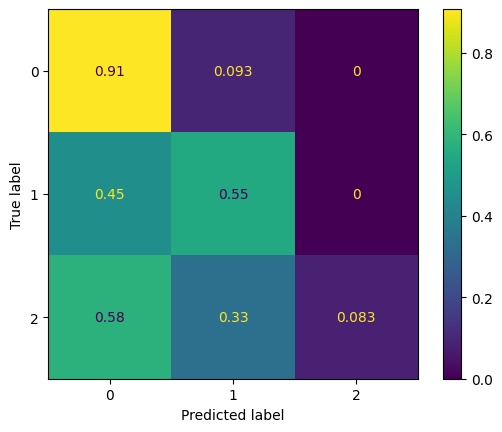

In [91]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_model['dt'], normalize='true')).plot()


In [92]:
print(f1_score(y_test, y_pred_test_model['dt'], average='macro'))
print(cohen_kappa_score(y_test, y_pred_test_model['dt']))

0.5046223617652189
0.37238493723849375


# 4) Repeat step 3 with a different classification model.

0.5447785447785448
0.3953732912723449


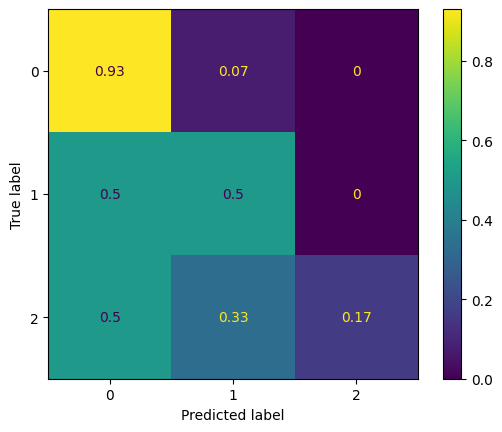

In [93]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_model['knn'], normalize='true')).plot()
print(f1_score(y_test, y_pred_test_model['knn'], average='macro'))
print(cohen_kappa_score(y_test, y_pred_test_model['knn']))

# 5) Choose the best model and comment the result.

Considering F1-score (the higher it is the better balance between precision and recall) and Cohen Kappa Score (the higher it is the better agreement).
K-Nearest-Neighbors ha higher values on both and so i would choose it.